In [1]:
import torch
import torch.utils.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from map_class import MapClass

In [4]:
#buildings data
building_sizes = [[0.1, 0.3], [0.1, 0.2], [1., 1.], [0.125, 0.2], [0.529, 0.12], [1.0, 0.3], [0.33, 0.3], 
                  [0.4, 0.4], [0.67, 0.3], [.33, 0.7], [.5, 0.1]]
#     torch.rand((10))

In [5]:
#gray colors data
gray_colors = [[0.1], [0.], [1.], [0.125], [0.529], [1.0], [0.33], [0.4], [0.67], [.33], [.5]]
#     torch.rand((10))

In [6]:
# Network configuration

data = gray_colors
batch_size = 4

length = 4
width = 3
number_iterations = 100

move_closer_coef = 0.5
iterations = 100

In [7]:
def basic_visualization(map_):
    plt.imshow(map_);
    plt.colorbar()
    plt.show()

In [8]:
trainloader = ""

def load_data(data, batch_size=4, shuffle=False):
    global dim
    dim = len(data[0])
    
    trainloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return trainloader

In [9]:
def map_view_for_coding(map_):
    return torch.transpose(map_, 0, 1).view(dim, length, width)
#     return map_.view(dim, length, width)

In [10]:
def map_display(map_):
#     return torch.transpose(map_, 0, 1).view(dim, length, width)
    if dim == 1:
        return map_.view(length, width)
    else:
        return map_.view(dim, length, width)

In [11]:
def cycle(map_, training_data, display_step=False):
    for batch in training_data:
#         type(batch)
#         print(batch)
        for row in batch[0]:
#             type(row)
#             print(row)
            i_bmu = map_.find_bmu(row).item()
            map_.move_closer(i_bmu, row)
        
#     print(map_view(map_.map))
    if display_step == True:
        basic_visualization(map_display(map_.map))
        print(map_display(map_.map))

In [12]:
def large_cycle(map_, training_data):
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))
    for i in range(number_iterations):
        cycle(map_, training_data)
    basic_visualization(map_display(map_.map))
    print(map_display(map_.map))

In [13]:
training = load_data(data)

In [14]:
map1 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [15]:
cycle(map1, training)

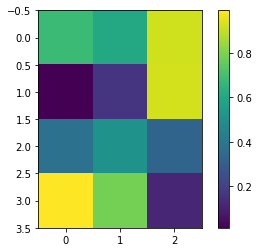

tensor([[0.6797, 0.6019, 0.9222],
        [0.0118, 0.1615, 0.9242],
        [0.3804, 0.5151, 0.3261],
        [0.9922, 0.7876, 0.1180]])


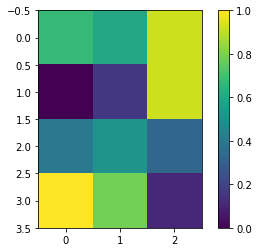

tensor([[6.7000e-01, 6.0192e-01, 9.2216e-01],
        [9.2696e-33, 1.6148e-01, 9.2420e-01],
        [4.0000e-01, 5.1741e-01, 3.3000e-01],
        [1.0000e+00, 7.8762e-01, 1.1615e-01]])


In [16]:
large_cycle(map1, training)

In [17]:
map2 = MapClass(length, width, dim, move_closer_coef)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


In [18]:
map2.map

tensor([[0.1424],
        [0.4531],
        [0.7990],
        [0.1431],
        [0.4431],
        [0.7600],
        [0.9159],
        [0.6253],
        [0.8921],
        [0.4203],
        [0.0709],
        [0.2350]])

In [19]:
map2.initialize_locations(map2.map)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2


[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2)]